## Data Overview

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data obtained from http://insideairbnb.com/get-the-data

df = pd.read_csv("./data/listings.csv")
df.shape


C:\Users\Nizar\AppData\Local\Temp\ipykernel_17464\3515395386.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/listings.csv")


(41533, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41533 entries, 0 to 41532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              41533 non-null  int64  
 1   name                            41520 non-null  object 
 2   host_id                         41533 non-null  int64  
 3   host_name                       41528 non-null  object 
 4   neighbourhood_group             41533 non-null  object 
 5   neighbourhood                   41533 non-null  object 
 6   latitude                        41533 non-null  float64
 7   longitude                       41533 non-null  float64
 8   room_type                       41533 non-null  object 
 9   price                           41533 non-null  int64  
 10  minimum_nights                  41533 non-null  int64  
 11  number_of_reviews               41533 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum().sort_values(ascending=False)

license                           41532
reviews_per_month                  9393
last_review                        9393
name                                 13
host_name                             5
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [6]:
# Generating a df of label descriptions
labels_temp = pd.read_excel("./data/Inside Airbnb Data Dictionary.xlsx")
labels_clean = labels_temp.iloc[6:]
labels_clean.columns = labels_clean.iloc[0]
labels = labels_clean.iloc[1:]
labels.head()

6,Field,Type,Calculated,Description,Reference
7,id,integer,NaN,Airbnb's unique identifier for the listing,NaN
8,listing_url,text,y,NaN,NaN
9,scrape_id,bigint,y,"Inside Airbnb ""Scrape"" this was part of",NaN
10,last_scraped,datetime,y,"UTC. The date and time this listing was ""scrap...",NaN
11,source,text,NaN,"One of ""neighbourhood search"" or ""previous scr...",NaN


In [7]:
# dropping useless features
columns_to_drop = ['Calculated', 'Reference']
labels = labels.drop(labels=columns_to_drop, axis=1)
labels = labels.reset_index(drop=True).rename_axis(None, axis=1)

In [9]:
# filtering out the columns of interest
features = list(df.columns)
labels.loc[labels['Field'].isin(features)]

,Field,Type,Description
0,id,integer,Airbnb's unique identifier for the listing
5,name,text,Name of the listing
9,host_id,integer,Airbnb's unique identifier for the host/user
11,host_name,text,Name of the host. Usually just the first name(s).
27,neighbourhood,text,NaN
30,latitude,numeric,Uses the World Geodetic System (WGS84) project...
31,longitude,numeric,Uses the World Geodetic System (WGS84) project...
33,room_type,text,[Entire home/apt|Private room|Shared room|Hote...
40,price,currency,daily price in local currency
41,minimum_nights,integer,minimum number of night stay for the listing (...


The licence information is missing and has no effect on the project so it can be dropped.

There are 13 entries under the `name` field that are missing, as well as 9393 entries related to reviews. Lets insepct these to see whats missing.

## EDA

What are the different `room_type`?

In [11]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

What `room_type` has higher price? 

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

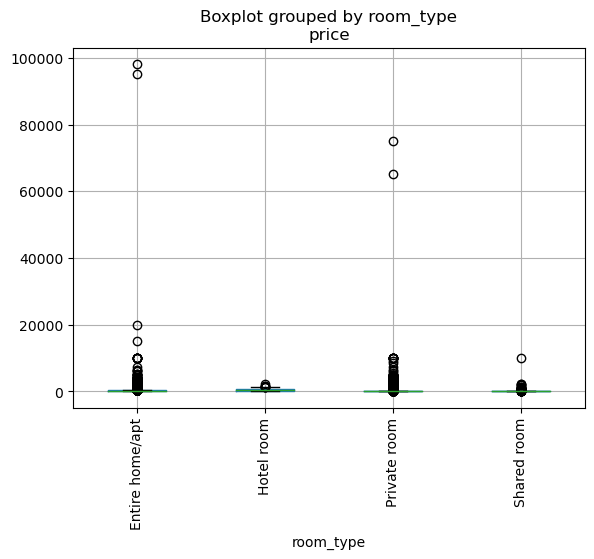

In [14]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
df.boxplot(column='price', by='room_type', rot=90, )
ax.get

What are the neighborhoods?

In [15]:
print(sorted(df.neighbourhood.unique()))

['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria', 'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace', 'Baychester', 'Bayside', 'Bayswater', 'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont', 'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale', 'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick', 'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill', 'Castleton Corners', 'Chelsea', 'Chelsea, Staten Island', 'Chinatown', 'City Island', 'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton', 'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point', 'Columbia St', 'Concord', 'Concourse', 'Concourse Village', 'Coney Island', 'Corona', 'Country Club', 'Crown Heights', 'Cypress Hills', 'DUMBO', 'Ditmars Steinway', 'Dongan Hills', 'Douglaston', 'Downtown Brooklyn', 'Dyker Heights', 'East Elmhurst', 'East Flatbush', 'East Harlem', 'East Morrisania', 'East New Y